Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2022/2023  
http://www.fer.unizg.hr/predmet/map

### Druga laboratorijska vježba - Analiza glavnih komponenti, Faktorska analiza, Multivarijatna linearna regresija, Kanonička korelacijska analiza

**Rok za predaju: 7. svibnja 2023. u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. **Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [11]:
# importing libraries
import numpy as np
import pandas as pd
import sklearn
import scipy as sp
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.svm import SVC
from sklearn.decomposition import PCA

### 0. Podatkovni skup

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne tjedne cijene ETF-ova (eng. exchange traded fund) koji prate određene dioničke, obvezničke ili druge indekse. Konkretno, radi se o sljedeća 22 fonda:

- `AGG` (iShares Core U.S. Aggregate Bond ETF) - obveznice s američkog tržišta,
- `IEF` (iShares 7-10 Year Treasury Bond ETF) - srednjeročne državne obveznice,
- `LQD` (iShares iBoxx $ Investment Grade Corporate Bond ETF) - korporativne obveznice,
- `SHY` (iShares 1-3 Year Treasury Bond ETF) - kratkoročne državne obveznice,
- `TIP` (iShares TIPS Bond ETF) - državne obveznice zaštićene od inflacije,
- `TLT` (iShares 20+ Year Treasury Bond ETF) - dugoročne državne obveznice,
- `DBC` (Invesco DB Commodity Index Tracking Fund) - sirovine i roba,
- `GLD` (SPDR Gold Trust) - zlato,
- `USO` (United States Oil Fund) - nafta,
- `IJH` (iShares Core S&P Mid-Cap ETF) - dionice tvrtki s američkog tržišta,
- `IWM` (iShares Russell 2000 ETF) - dionice američkih tvrtki s malim kapitalom,
- `SPY` (SPDR S&P 500 ETF Trust) - dionice tvrtki s američkog tržišta,
- `VTV` (Vanguard Value ETF) - dionice tvrtki s američkog tržišta,
- `XLB` (Materials Select Sector SPDR Fund) - dionice tvrtki za materijale,
- `XLE` (Energy Select Sector SPDR Fund) - dionice tvrtki energetskog sektora,
- `XLF` (Financial Select Sector SPDR Fund) - dionice tvrtki financijskog sektora,
- `XLI` (Industrial Select Sector SPDR Fund) - dionice tvrtki industrijskog sektora,
- `XLK` (Technology Select Sector SPDR Fund) - dionice tvrtki iz tehnološkog sektora,
- `XLP` (Consumer Staples Select Sector SPDR Fund) - dionice tvrki za necikličku potrošačku robu,
- `XLU` (Utilities Select Sector SPDR Fund) - dionice tvrtki komunalnih djelatnosti,
- `XLV` (Health Care Select Sector SPDR Fund) - dionice tvrtki iz zdravstvenog sektora,
- `XLY` (Consumer Discretionary Select Sector SPDR Fund) - dionice tvrtki za cikličku potršačku robu,
- `IYR` (iShares U.S. Real Estate ETF) - dionice tvrtki iz područja nekretnina,
- `VNQ` (Vanguard Real Estate Index Fund) - dionice tvrtki iz područja nekretnina.

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, najčešće se koriste povrati: $R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$ gdje je $S(t)$ cijena vrijednosnice u trenutku (tjednu) $t$. 

#### (a)
Podaci se nalaze u datoteci "ETFprices.csv". Učitajte ih, provjerite ispravnost, izračunajte tjedne povrate te vizualizirajte matricu korelacije povrata. U ostatku laboratorijske vježbe također koristite povrate, a ne cijene. 

         AGG        IEF        LQD        SHY        TIP        TLT  \
0  65.098267  56.765045  60.709454  65.214424  68.620300  55.092194   
1  65.111481  57.075443  60.989243  65.304390  69.292107  55.327076   
2  65.323631  57.011932  61.000893  65.361687  69.188210  54.909496   
3  65.173912  56.816486  60.832329  65.355927  69.045479  54.758831   
4  64.934387  56.540386  60.715195  65.355927  69.115135  54.136620   

         DBC        GLD        USO        IJH  ...        XLE        XLF  \
0  23.188368  59.500000  68.820000  65.633980  ...  42.919556  15.426526   
1  24.197361  63.200001  72.809998  67.693954  ...  45.941833  15.730494   
2  23.716009  65.089996  69.620003  67.358994  ...  43.942360  16.129461   
3  23.790062  67.989998  68.000000  68.388985  ...  45.265102  16.224453   
4  24.854595  71.120003  69.110001  66.195053  ...  43.634747  15.768493   

         XLI        XLK        XLP        XLU        XLV        XLY  \
0  25.990246  18.212362  16.622107  18.971766

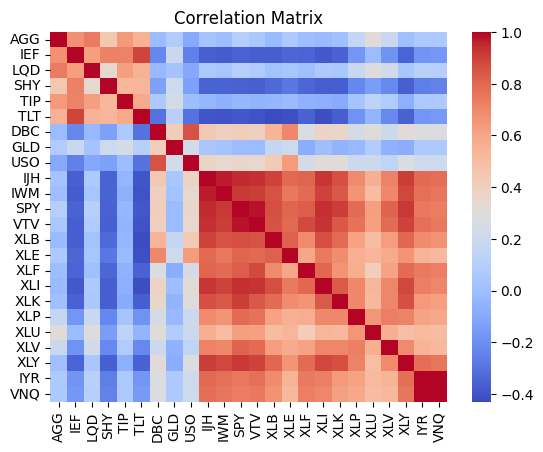

In [17]:
# Load the data
df = pd.read_csv('ETFprices.csv')

# Remove the first column (assumes it contains non-numeric data)
df = df.drop(columns=df.columns[0])

# Check the data
print(df.head())
print(df.info())
print(df.describe())

# Calculate weekly returns
returns = df.pct_change(1)

# Visualize a correlation matrix
sns.heatmap(returns.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()
print()

### 1. Analiza glavnih komponenti

#### (a) 
Izračunajte glavne komponente matrice korelacije i izračunajte koliki udio varijance objašnjavaju. Odredite broj glavnih komponenti. 

Explained Variance Ratio:
PC1: 0.890
PC2: 0.068
PC3: 0.015
PC4: 0.008
PC5: 0.006
PC6: 0.005
PC7: 0.002
PC8: 0.002
PC9: 0.001
PC10: 0.001
PC11: 0.001
PC12: 0.001
PC13: 0.000
PC14: 0.000
PC15: 0.000
PC16: 0.000
PC17: 0.000
PC18: 0.000
PC19: 0.000
PC20: 0.000
PC21: 0.000
PC22: 0.000
PC23: 0.000
PC24: 0.000


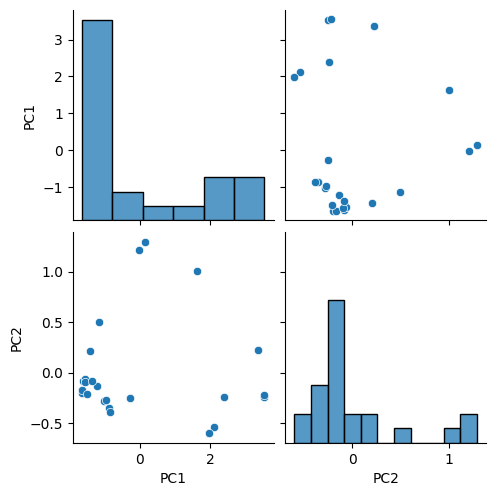

In [20]:
# Calculate the correlation matrix
corr = returns.corr()

# Calculate the principal components
pca = PCA().fit(corr)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print the explained variance ratio
print("Explained Variance Ratio:")
for i in range(len(explained_variance)):
    print(f"PC{i+1}: {explained_variance[i]:.3f}")

# Decide on the number of principal components
num_components = 2

# Project the data onto the selected number of principal components
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(corr)

# Create a DataFrame to store the principal components
pc_df = pd.DataFrame(data=principal_components,
                     columns=[f"PC{i+1}" for i in range(num_components)],
                     index=corr.index)

# Visualize the principal components
sns.pairplot(pc_df)
plt.show()

#### (b)
Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti. Grafički prikažite i usporedite koeficijente prvih nekoliko komponenti.

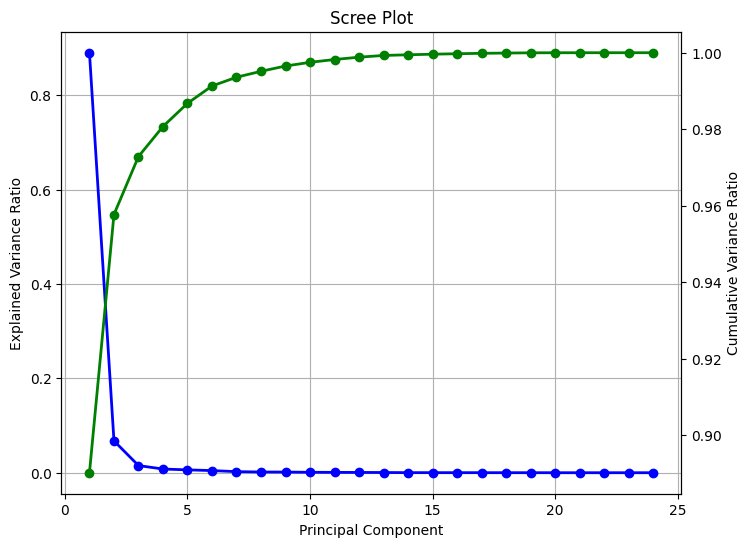

In [15]:
# Create a scree plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(1, len(explained_variance) + 1), explained_variance, 'bo-', linewidth=2)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Scree Plot')
ax.grid(True)

# Calculate the cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Create a second y axis for cumulative variance
ax2 = ax.twinx()
ax2.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, 'go-', linewidth=2)
ax2.set_ylabel('Cumulative Variance Ratio')

plt.show()

#### (c) 
Prikažite graf raspršenja prve dvije glavne komponente i proučite možete li primijetiti neke zanimljive grupe. 


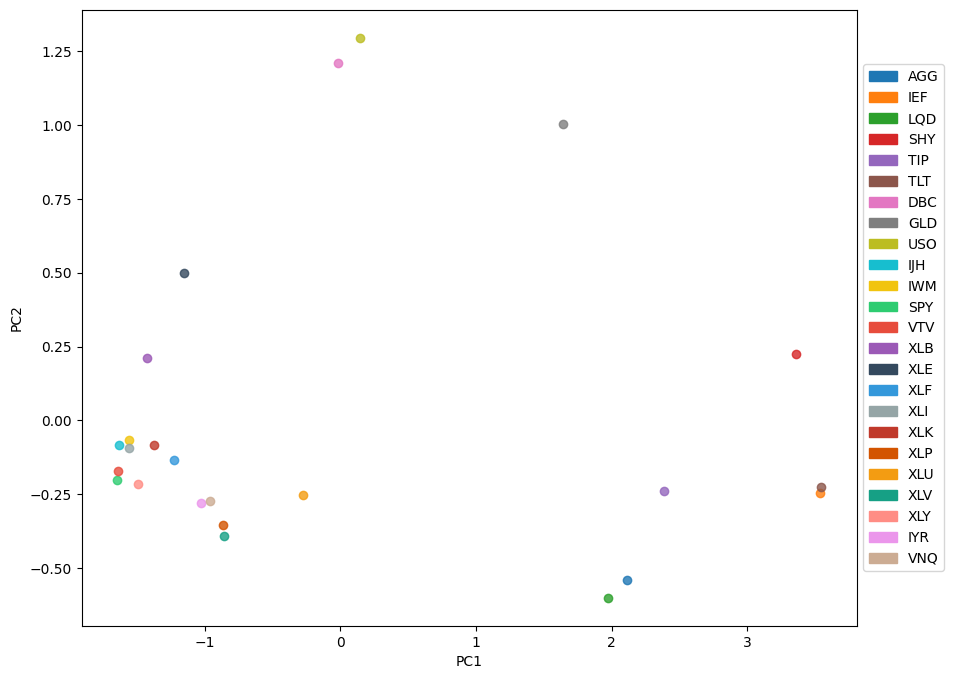

In [27]:
import matplotlib.patches as mpatches

# Define a list of colors for each ETF
etf_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
              '#f1c40f', '#2ecc71', '#e74c3c', '#9b59b6', '#34495e',
              '#3498db', '#95a5a6', '#c0392b', '#d35400', '#f39c12',
              '#16a085', '#ff8d85', '#eb96eb', '#ccac93']

# If there are more ETFs than colors, repeat the colors list
if len(etf_colors) < len(pc_df):
    num_repeats = len(pc_df) // len(etf_colors) + 1
    etf_colors = (etf_colors * num_repeats)[:len(pc_df)]

# Create a scatter plot of the first two principal components, colored by ETF
plt.figure(figsize=(10, 8))
for i in range(len(pc_df)):
    plt.scatter(pc_df.iloc[i, 0], pc_df.iloc[i, 1], color=etf_colors[i], alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add a legend to the plot
handles = []
labels = []
for i in range(len(returns.columns)):
    handles.append(mpatches.Patch(color=etf_colors[i], label=returns.columns[i]))
    labels.append(returns.columns[i])
plt.legend(handles=handles, labels=labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### (d)
U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji. Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Često je dobro pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, dobro je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:
$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.
Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.
Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:
$R_p = \sum{R_i w_i} = R\cdot w$.
Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve dvije glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta dva svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100). Također izračunajte anualizirane srednje vrijednosti i volatilnosti svojstvenih portfelja.

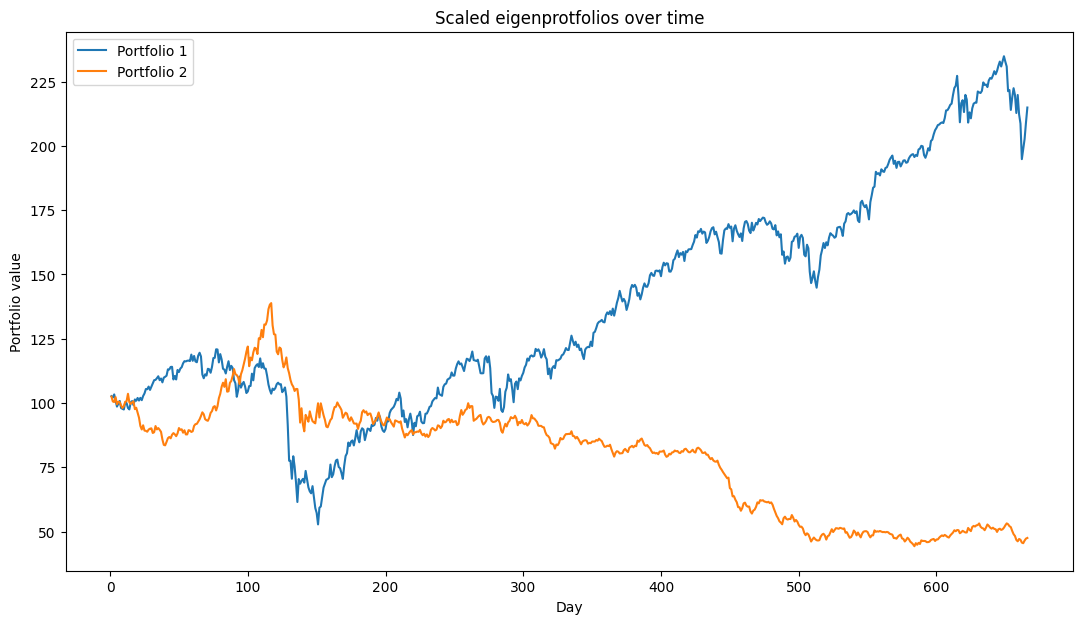

Yearly means of scaled eigenportfolios:
0    0.369546
1   -0.243291
dtype: float64

Yearly volatilities of scaled eigenportfolios:
0    0.398638
1    0.275752
dtype: float64



In [33]:
cov_matrix = returns.cov()

pca = PCA()
pca.fit(cov_matrix)

#first two portfolios
eigenportfolios = pca.components_[:2, :]

# change +/-
eigenportfolios *= np.sign(eigenportfolios.sum(axis=1)).reshape(-1, 1)

# scale portoflios
abs_sum = np.abs(eigenportfolios).sum(axis=1)
eigenportfolios /= abs_sum.reshape(-1, 1)

# calculate portfolio returns
portfolio_returns = returns @ eigenportfolios.T

# Change back to prices
starting_price = 100
portfolio_prices = starting_price * (1 + portfolio_returns).cumprod()

# Graph results
plt.figure(figsize=(13, 7))
plt.plot(portfolio_prices)
plt.xlabel('Day')
plt.ylabel('Portfolio value')
plt.title('Scaled eigenprotfolios over time')
plt.legend(['Portfolio 1', 'Portfolio 2'])
plt.show()

# Yearly means
annualized_mean_returns = portfolio_returns.mean() * 252

# Yearly volatility
annualized_volatility = portfolio_returns.std() * np.sqrt(252)

# Results
print('Yearly means of scaled eigenportfolios:')
print(annualized_mean_returns)
print()
print('Yearly volatilities of scaled eigenportfolios:')
print(annualized_volatility)
print()

### 2. Faktorska analiza

#### (a)
Na danim podacima odredite broj faktora te provedite faktorsku analizu pomoću dvije različite metode. Procijenite parametre modela te ih usporedite. Koja procjena Vam se čini bolja? Što možete zaključiti iz vrijednosti faktora? Pronađite procjenu vrijednosti faktora koja daje najbolju interpretabilnost.

In [ ]:
!pip install factor_analyzer

In [39]:
from factor_analyzer import FactorAnalyzer

# Decide on the number of factors
n_factors = 6

# Fit the factor model using MLE
fa_mle = FactorAnalyzer(n_factors, rotation=None, method='ml')
fa_mle.fit(returns)

# Get the variance explained by the factors using MLE
variance_explained_mle = fa_mle.get_factor_variance()[2][-1]
print(f"Variance explained by MLE: {variance_explained_mle:.2f}")

# Fit the factor model using PAF
fa_paf = FactorAnalyzer(n_factors, rotation=None, method='principal')
fa_paf.fit(returns)

# Get the variance explained by the factors using PAF
variance_explained_paf = fa_paf.get_factor_variance()[2][-1]
print(f"Variance explained by PAF: {variance_explained_paf:.2f}")
print()
# Get the factor loadings using MLE and PAF methods
loadings_mle = fa_mle.loadings_
loadings_paf = fa_paf.loadings_

# Print the factor loadings using MLE method
print("Factor Loadings (MLE):")
print(loadings_mle)

# Print the factor loadings using PAF method
print("\nFactor Loadings (PAF):")
print(loadings_paf)


Variance explained by MLE: 0.80
Variance explained by PAF: 0.87

Factor Loadings (MLE):
[[ 3.09403186e-02  4.43653827e-01  6.35695174e-01 -2.45468567e-03
   1.31639697e-01  6.24267328e-02]
 [-3.49150796e-01  7.32432281e-01  5.75942097e-01  1.66413377e-02
  -1.40268774e-02 -8.22007451e-03]
 [ 6.91262919e-02  4.51195742e-01  5.64516499e-01 -1.91714907e-02
   1.06211773e-01  8.06272394e-03]
 [-3.67350812e-01  4.71952082e-01  4.22692995e-01  9.43930474e-02
  -9.06511054e-02 -1.71187615e-02]
 [-3.53926727e-02  5.52932311e-01  5.21562920e-01  1.67660595e-01
  -2.73118317e-04  1.80677507e-02]
 [-3.64044927e-01  7.08470702e-01  4.26566484e-01 -5.85608655e-02
   4.44045760e-02  1.18639231e-03]
 [ 3.95760177e-01 -2.14242222e-01  9.17401540e-02  8.50342071e-01
   3.79907871e-02  1.16066927e-01]
 [ 2.31414730e-02  1.71626438e-01  9.81861031e-02  5.02268941e-01
  -6.12568838e-02 -5.72510263e-03]
 [ 3.28650534e-01 -2.47282910e-01  5.04334900e-02  7.55770978e-01
   1.85538507e-03  1.41949963e-01]
 [ 

#### (b)
Izračunajte specifične varijance faktora za model s dva faktora i model s tri faktora. Pomoću stupčastog dijagrama prikažite i usporedite dobivene vrijednosti. 

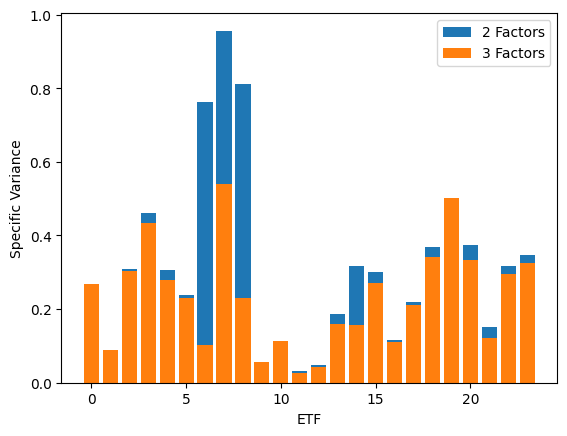

In [49]:
# Fit the factor model with 2 factors
fa_2factors = FactorAnalyzer(n_factors=2, rotation=None, method='principal')
fa_2factors.fit(returns)

# Calculate specific variances for the 2-factor model
specific_variances_2factors = fa_2factors.get_uniquenesses()

# Fit the factor model with 3 factors
fa_3factors = FactorAnalyzer(n_factors=3, rotation=None, method='principal')
fa_3factors.fit(returns)

# Calculate specific variances for the 3-factor model
specific_variances_3factors = fa_3factors.get_uniquenesses()


# Plot the specific variances for both models
plt.bar(range(len(specific_variances_2factors)), specific_variances_2factors, label='2 Factors')
plt.bar(range(len(specific_variances_3factors)), specific_variances_3factors, label='3 Factors')
plt.xlabel('ETF')
plt.ylabel('Specific Variance')
plt.legend()
plt.show()

### 3. Multivarijatna linearna regresija

#### (a)
Provedite 3 univarijatne linearne regresije koristeći povrate ETF-ova `AGG`, `DBC` i `SPY` kao zavisne varijable. Svaku regresiju provedite sa svim preostalim povratima ETF-ova kao nezavnim varijablama. Za svaku regresiju ispišite koeficijente te njihovu signifikantnost.

In [57]:
import statsmodels.api as sm
df = pd.read_csv('ETFprices.csv')

# Remove the first column (assumes it contains non-numeric data)
df = df.drop(columns=df.columns[0])


# Calculate weekly returns
returns = df.pct_change(1)

# Fill missing values with the mean of each column
returns = returns.fillna(returns.mean())

# Define the dependent variables
dep_vars = ["AGG", "DBC", "SPY"]

# Loop through each dependent variable and fit a linear regression model
for dep_var in dep_vars:
    # Define the independent variables
    independent_vars = returns.drop(dep_var, axis=1)
    
    # Fit a linear regression model
    reg = LinearRegression().fit(independent_vars, returns[dep_var])
    
    # Use statsmodels to obtain p-values of coefficients
    X2 = sm.add_constant(independent_vars)
    est = sm.OLS(returns[dep_var], X2)
    est2 = est.fit()
    
    # Print the coefficients, their weights, and their significance
    print(f"Dependent variable: {dep_var}")
    for i in range(len(independent_vars.columns)):
        print(f"{independent_vars.columns[i]}: {reg.coef_[i]} (p-value: {est2.pvalues[i+1]:.4f})")
    print(f"Intercept: {reg.intercept_} (p-value: {est2.pvalues[0]:.4f})")
    print()

Dependent variable: AGG
IEF: 0.381625779810067 (p-value: 0.0000)
LQD: 0.22266013045091332 (p-value: 0.0000)
SHY: 0.040335260335035115 (p-value: 0.7596)
TIP: 0.07756939122511791 (p-value: 0.0024)
TLT: -0.02740407484511548 (p-value: 0.1303)
DBC: 0.009618390217955474 (p-value: 0.4263)
GLD: -0.014849769441336086 (p-value: 0.0298)
USO: -0.012828788415489832 (p-value: 0.0393)
IJH: 0.009825953469359756 (p-value: 0.7306)
IWM: -0.016082293144992682 (p-value: 0.3731)
SPY: 0.8709357184494473 (p-value: 0.0000)
VTV: -0.3083659035056882 (p-value: 0.0000)
XLB: -0.032426639236685664 (p-value: 0.0049)
XLE: -0.014940852953695181 (p-value: 0.1854)
XLF: -0.006542922245975972 (p-value: 0.4692)
XLI: -0.1006818249354638 (p-value: 0.0000)
XLK: -0.1721375789201851 (p-value: 0.0000)
XLP: -0.04162895174366227 (p-value: 0.0052)
XLU: 0.01524453448458186 (p-value: 0.0938)
XLV: -0.07510198697798641 (p-value: 0.0000)
XLY: -0.062224494869698416 (p-value: 0.0000)
IYR: 0.017879964935882356 (p-value: 0.6536)
VNQ: -0.0314

#### (b)
Provedite multivarijatnu linearnu regresiju koristeći ETF-ove `AGG`, `DBC` i `SPY` kao zavisne varijable. Za nezavisne varijable uzmite sve preostale ETF-ove. Ispišite signifikantnost koeficijenata multivarijatne regresije. 

In [ ]:
!pip install linearmodels

In [67]:
from linearmodels.system import SUR
df = pd.read_csv('ETFprices.csv')

# Remove the first column (assumes it contains non-numeric data)
df = df.drop(columns=df.columns[0])

# Calculate weekly returns
returns = df.pct_change(1)

# Fill missing values with the mean of each column
returns = returns.fillna(returns.mean())

# Define the dependent variables
dep_vars = ["AGG", "DBC", "SPY"]

# Define the independent variables
independent_vars = returns.drop(columns=dep_vars)

# Fit the multivariate linear regression model
reg = LinearRegression().fit(independent_vars, returns[dep_vars])
#model = sm.OLS(returns[['AGG', 'DBC', 'SPY']], sm.add_constant(independent_vars)).fit()
# Print the coefficients and their weights
print("Coefficients:")
for i in range(len(dep_vars)):
    print(f"{dep_vars[i]}: {reg.coef_[i]} ")
print(f"Intercept: {reg.intercept_}")
print()
X2 = sm.add_constant(independent_vars)
est = sm.OLS(returns[dep_var], X2)
model = SUR.multivariate_ls(returns[dep_vars], X2)
res=model.fit()

# Print the summary of the model
print(res.summary)


Coefficients:
AGG: [ 0.38626033  0.2809012   0.09513816  0.09023075 -0.04910982 -0.01246482
 -0.01629268  0.02915008 -0.01203987  0.01506809 -0.01321802  0.05138517
  0.02005082 -0.07910103  0.00773715  0.01649985  0.03214299  0.01115163
  0.01985432 -0.0673621   0.04164152] 
DBC: [-0.26754508  0.22659672 -0.36278132  0.24745595 -0.0953159   0.22044812
  0.37503499  0.06472431 -0.06440015 -0.20132436  0.13119186  0.15441595
  0.02436657 -0.0532163   0.05355173 -0.00295269  0.08262972 -0.06122681
  0.0050586  -0.23655987  0.21702055] 
SPY: [ 8.27604349e-03  6.43693546e-02  6.69306278e-02  1.18048092e-02
 -2.38696820e-02  3.03808720e-04 -8.11900119e-03  2.14729793e-02
  5.35269213e-03  3.73587173e-01  2.06062989e-02  7.44495681e-02
  3.02655756e-02  2.53665666e-02  2.05939014e-01  6.67755339e-02
  1.84900971e-02  9.97117472e-02  9.41862404e-02 -9.52616118e-02
  8.14944142e-02] 
Intercept: [-5.80213695e-05  1.20796633e-05 -2.57778131e-04]

                           System OLS Estimation 

#### (c)
Ponovite proceduru iz (b), ali zadržite samo varijable s koeficijentima na 0.05 razini signifikantnosti. Usporedite ovaj model s modelom iz (b).  Je li izbacivanje varijabli dovelo do pogoršanja modela?


In [ ]:
#Vjerojatno ne bi došlo dopogoršanja modela ako izbacimo podatke koji nam nisu statistički značajni.

### 4. Kanonička korelacijska analiza

Za potrebe ovog zadatka standardizirajte podatke i podijelite skup ETF-ova na dva skupa tako da: 
- prvi skup sadrži: `AGG`, `LQD`, `TIP` ,`DBC`, `USO`,`IWM`, `VTV`, `XLE`, `XLI`, `XLP`, `XLV`, `IYR`,  
- drugi skup sadrži: `IEF`, `LQD`, `SHY`, `TLT`, `GLD`, `IJH`,`SPY`, `XLB`, `XLF`, `XLK`, `XLU`,`XLY`, `VNQ`.


In [69]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('ETFprices.csv')

# Remove the first column (assumes it contains non-numeric data)
df = df.drop(columns=df.columns[0])

# Calculate weekly returns
returns = df.pct_change(1)

# Fill missing values with the mean of each column
returns = returns.fillna(returns.mean())

# Standardize the data
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(returns)

# Define the two sets of variables
set1 = returns[['AGG', 'LQD', 'TIP', 'DBC', 'USO', 'IWM', 'VTV', 'XLE', 'XLI', 'XLP', 'XLV', 'IYR']]
set2 = returns[['IEF', 'LQD', 'SHY', 'TLT', 'GLD', 'IJH', 'SPY', 'XLB', 'XLF', 'XLK', 'XLU', 'XLY', 'VNQ']]

#### (a) 
Provedite kanoničku korelacijsku analizu s maksimalnim brojem parova kanoničkih varijabli. Koliko kanoničkih parova je statistički značajno? 

In [85]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=12)
cca.fit(set1, set2)

ccorr = cca.score(set1, set2)
print("Overall strength of the canonical correlation between the two datasets:", ccorr)
can_corrs = cca.transform(set1, set2)
can_vars1 = can_corrs[0]
can_vars2 = can_corrs[1]

n_significant_pairs = 0
for i in range(12):
    for j in range(12):
        if i != j:
            r, pval = np.corrcoef(can_vars1[:, i], can_vars2[:, j])
            if pval[0] < 0.05:
                n_significant_pairs += 1

print("Number of significant pairs:", n_significant_pairs)

Overall strength of the canonical correlation between the two datasets: 0.5912255861220915
Number of significant pairs: 132


#### (b)
Pomoću *scree plota* prikažite korelacije dobivenih parova kanoničkih varijabli. 

In [90]:
# Plot the scree plot
#plt.plot(range(1, can_corrs[0] + 1), can_corrs)
#plt.xlabel("Canonical Variable Pair Index")
#plt.ylabel("Canonical Correlation")
#plt.show()



#### (c)
Promotrite korelacije između kanoničkih varijabli i originalnih varijabli kako bi interpretirali kanoničke varijable u terminima originalnih. Za svaki skup posebno pomoću stupčastog dijagrama prikažite korelacije originalnih varijabli i prva tri para kanoničkih varijabli (slično kao u zadatku 1.(b)). 

**Hint**: Interpretacija populacijskih kanoničkih varijabli (Predavanje 7)

In [ ]:
# <Vaš kôd ovdje>